### Image Classification with Tensorflow ###


### Preparation ###
In this worksheet you will collect two sets of images for classification. One of the class will be labeled "pos" and the other "neg". You can download the images from Internet. For example the positive ("pos") images can be only male portrait photos, and the "neg" are female portrait photos. Decide on how many images you want to use for training. Adjust the quantity after you have tested it, i.e. you may want to add more images if the classifcation don't work well. 

On your computer create a folder structure like this:

![](img/folder.png)

In the "pos" folder put in all the positive images, and in the "neg" folder put in the negative images. In the separate "test" folder put in a mix class of images that you want to test.

If you want to upload to colab, then zip the entire folders to create a zipped file called: dataset.zip

The dataset.zip should have this structure:

![](img/zipfolder.png)

In [4]:
#!pip install tensorflow==2.0

In [5]:
import tensorflow as tf
print(tf.__version__)

2.7.0


If you are using Colab at https://colab.research.google.com/ and you want to upload training files, see below:

In [6]:
#optional
from google.colab import files
uploaded = files.upload()

Saving dataset.zip to dataset (1).zip


For Colab, after uploading, you want to unzip them. 

In [7]:
#optional for colab
import zipfile
import io
data = zipfile.ZipFile(io.BytesIO(uploaded['dataset.zip']), 'r')
data.extractall()
#data.printdir()

#Now everything is ready, let us check that by printing content of (data) folder:
data.printdir()

#wait for the file to be unzipped. It will appear in the files folder on the left

File Name                                             Modified             Size
dataset/neg/                                   2021-12-24 13:47:56            0
dataset/neg/000006.jpg                         2020-12-25 10:00:04         8073
dataset/neg/000022.jpg                         2020-12-25 10:00:04         5911
dataset/neg/000035.jpg                         2020-12-25 10:00:04         7887
dataset/neg/000040.jpg                         2020-12-25 10:00:04         6380
dataset/neg/000043.jpg                         2020-12-25 10:00:04         6813
dataset/neg/000058.jpg                         2020-12-25 10:00:04         6780
dataset/neg/000073.jpg                         2020-12-25 10:00:04         7723
dataset/neg/000077.jpg                         2020-12-25 10:00:04         7543
dataset/neg/000083.jpg                         2020-12-25 10:00:04         7250
dataset/neg/000088.jpg                         2020-12-25 10:00:04         9508
dataset/neg/000108.jpg                  

Install imutils if not installed yet

In [8]:
!pip install imutils

Define the NN model in a class

In [9]:
# import the necessary packages tf 2.0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K

class LeNet:
    @staticmethod
    def build(width, height, depth, classes):
        # initialize the model
        model = Sequential()
        inputShape = (height, width, depth)

        # if we are using "channels first", update the input shape
        #if K.image_data_format() == "channels_first":
        #    inputShape = (depth, height, width)
        # first set of CONV => RELU => POOL layers
        model.add(Conv2D(20, (5, 5), padding="same",input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        # second set of CONV => RELU => POOL layers
        model.add(Conv2D(50, (5, 5), padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        # first (and only) set of FC => RELU layers
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation("relu"))

        # softmax classifier
        model.add(Dense(classes))
        model.add(Activation("softmax"))

        # return the constructed network architecture
        return model


Define some parameters and variables

In [10]:
#initialise name of dataset, model name and image file to save
args={'dataset':'dataset','model':'my.model','plot':'plot.png'}

# initialize the number of epochs to train for, initial learning rate,
# and batch size
EPOCHS = 25
INIT_LR = 1e-3
BS = 32

# initialize the data and labels
data = []
labels = []

Initialize imports

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical

from imutils import paths
import matplotlib.pyplot as plt
import numpy as np

import random
import cv2
import os

Read in the image paths and randomly shuffle them. Resize all image and add the class labels according to the folder it is in. Additional images are generated that are modified.
See: https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/

In [12]:
# grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images(args["dataset"])))

random.seed(42)
random.shuffle(imagePaths)
# loop over the input images

for imagePath in imagePaths:
    # load the image, pre-process it, and store it in the data list
    print(imagePath)
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (28, 28))
    image = img_to_array(image)
    data.append(image)

    # extract the class label from the image path and update the
    # labels list
    label = imagePath.split(os.path.sep)[-2]

    #CLASS info is based on the folder named ‘pos’ 
    label = 1 if label == "pos" else 0
    labels.append(label)

# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, random_state=42)

# convert the labels from integers to vectors
trainY = to_categorical(trainY, num_classes=2)
testY = to_categorical(testY, num_classes=2)

# construct the image generator for data augmentation – adding additional images 
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,
                         height_shift_range=0.1, shear_range=0.2, 
                         zoom_range=0.2,horizontal_flip=True, fill_mode="nearest")


dataset/neg/093338.jpg
dataset/test/160220.jpg
dataset/pos/107670.jpg
dataset/neg/159798.jpg
dataset/pos/000007.jpg
dataset/test/168078.jpg
dataset/pos/105706.jpg
dataset/pos/000052.jpg
dataset/pos/159883.jpg
dataset/neg/093051.jpg
dataset/pos/159728.jpg
dataset/pos/000064.jpg
dataset/pos/000065.jpg
dataset/neg/093546.jpg
dataset/test/160118.jpg
dataset/neg/089697.jpg
dataset/test/160610.jpg
dataset/pos/000229.jpg
dataset/pos/106433.jpg
dataset/neg/092722.jpg
dataset/test/160085.jpg
dataset/neg/000022.jpg
dataset/pos/000299.jpg
dataset/pos/108160.jpg
dataset/neg/091632.jpg
dataset/test/094590.jpg
dataset/test/160229.jpg
dataset/pos/108420.jpg
dataset/pos/159988.jpg
dataset/neg/088853.jpg
dataset/test/095399.jpg
dataset/pos/108764.jpg
dataset/neg/159906.jpg
dataset/test/160072.jpg
dataset/pos/105876.jpg
dataset/neg/088730.jpg
dataset/pos/000055.jpg
dataset/pos/000032.jpg
dataset/pos/000214.jpg
dataset/pos/000051.jpg
dataset/pos/159763.jpg
dataset/test/160041.jpg
dataset/neg/092386.jpg
d

Construct and compile the neural network model. It is then trained via the fit function.

In [13]:
# initialize the model

model = LeNet.build(width=28, height=28, depth=3, classes=2)

opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS) 

model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["acc"])

# train the network
H = model.fit(aug.flow(trainX, trainY, batch_size=BS),
        validation_data=(testX, testY), steps_per_epoch=int(len(trainX)/BS),
        epochs=EPOCHS, verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/25
3/3 [==============================] - 2s 224ms/step - loss: 0.9895 - acc: 0.5625 - val_loss: 0.6795 - val_acc: 0.7222
Epoch 2/25
3/3 [==============================] - 0s 112ms/step - loss: 0.7253 - acc: 0.4474 - val_loss: 0.6959 - val_acc: 0.4444
Epoch 3/25
3/3 [==============================] - 0s 117ms/step - loss: 0.6986 - acc: 0.4342 - val_loss: 0.6902 - val_acc: 0.6111
Epoch 4/25
3/3 [==============================] - 0s 167ms/step - loss: 0.6872 - acc: 0.6316 - val_loss: 0.6894 - val_acc: 0.5556
Epoch 5/25
3/3 [==============================] - 1s 139ms/step - loss: 0.6808 - acc: 0.6184 - val_loss: 0.6900 - val_acc: 0.5556
Epoch 6/25
3/3 [==============================] - 1s 218ms/step - loss: 0.6720 - acc: 0.5921 - val_loss: 0.6976 - val_acc: 0.5556
Epoch 7/25
3/3 [==============================] - 1s 234ms/step - loss: 0.6587 - acc: 0.6146 - val_loss: 0.7200 - val_acc: 0.5556
Epoch 8/25
3/3 [==============================] - 1s 217ms/step - loss: 0.6675 - acc: 0.60

Save the model, maybe for later use without retraining..

In [14]:
# save the model to disk
print("[INFO] serializing network...")
model.save(args["model"])

[INFO] serializing network...
INFO:tensorflow:Assets written to: my.model/assets


Plot the loss and accuracy

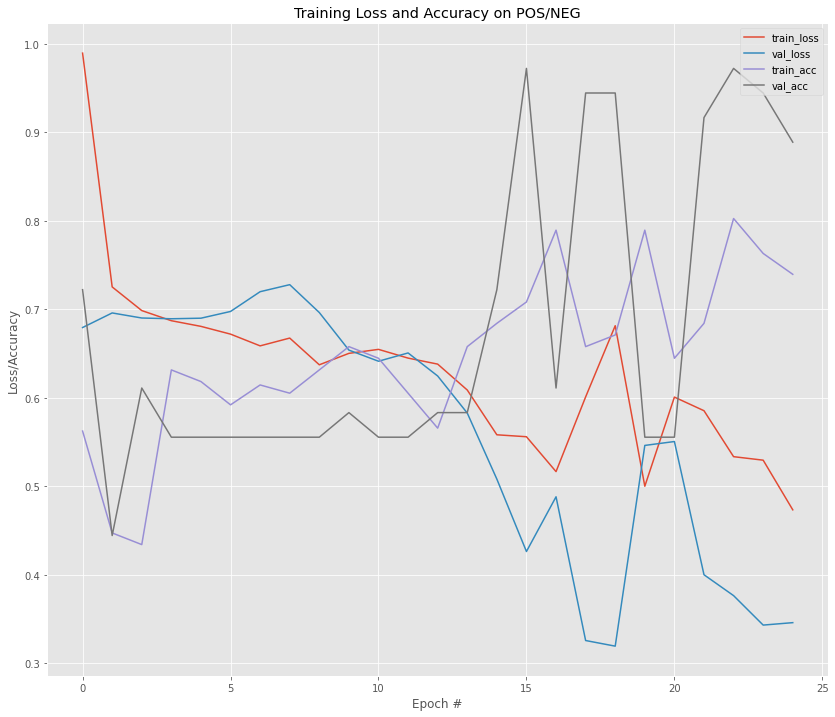

In [15]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure(figsize=[14,12])
N = EPOCHS
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on POS/NEG")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")
plt.savefig(args["plot"])


In [16]:
from google.colab import files
import os
os.listdir('.')
files.download('my.model') #name must be the same in model.save

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Test model on other images

[[1. 0.]]


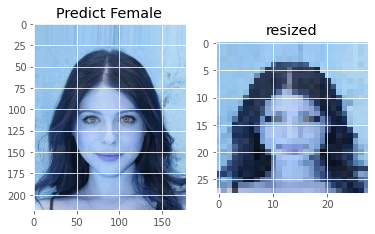

[[1. 0.]]


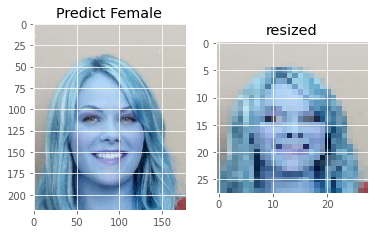

[[0. 1.]]


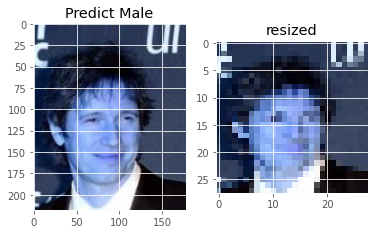

[[1. 0.]]


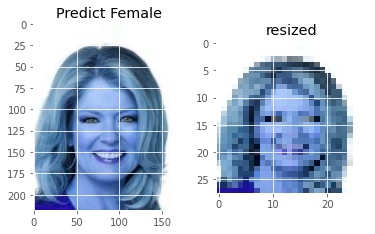

[[0. 1.]]


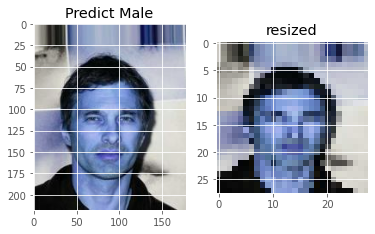

[[1. 0.]]


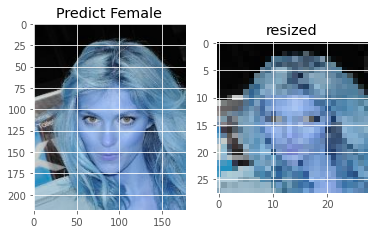

[[0. 1.]]


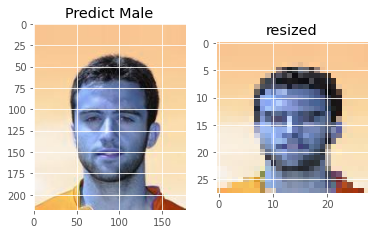

[[1. 0.]]


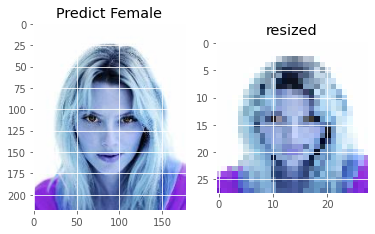

[[1.0000000e+00 7.1179236e-11]]


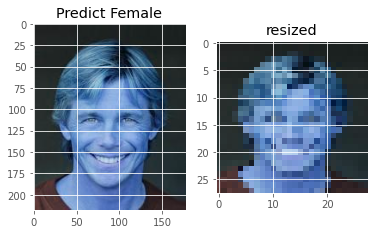

[[0. 1.]]


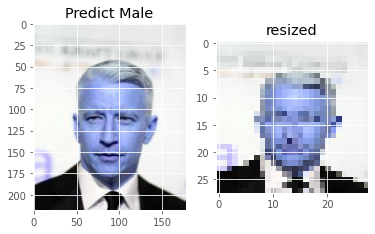

[[0. 1.]]


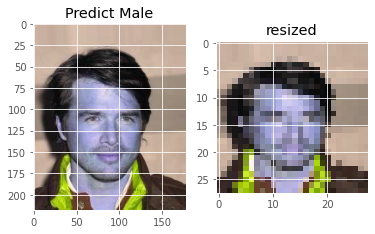

[[1. 0.]]


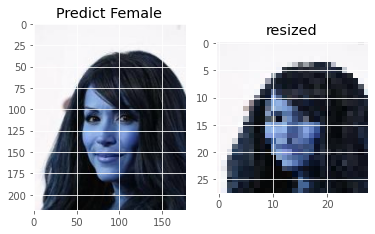

[[1. 0.]]


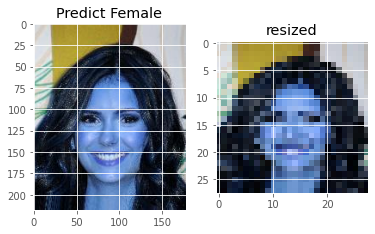

[[1.000000e+00 7.286554e-11]]


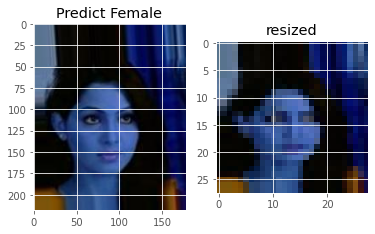

[[1. 0.]]


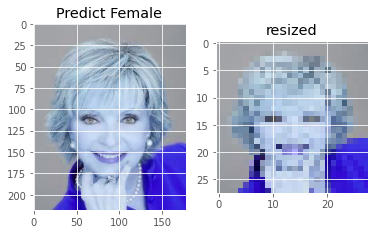

[[1. 0.]]


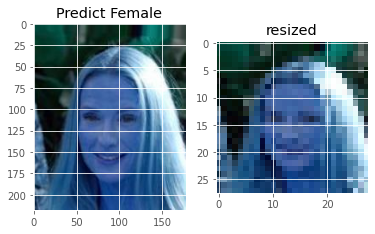

[[1. 0.]]


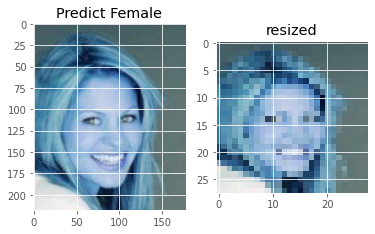

[[1. 0.]]


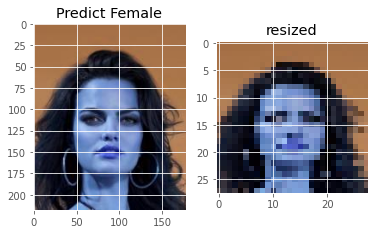

[[1. 0.]]


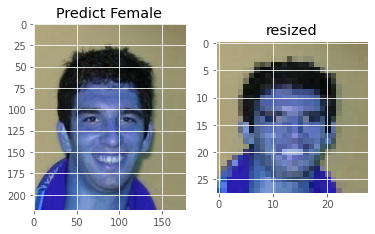

[[0. 1.]]


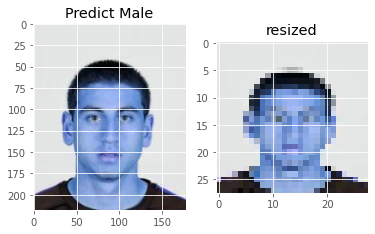

[[9.737334e-36 1.000000e+00]]


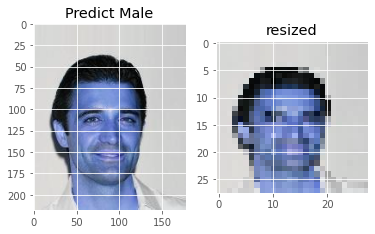

[[0. 1.]]


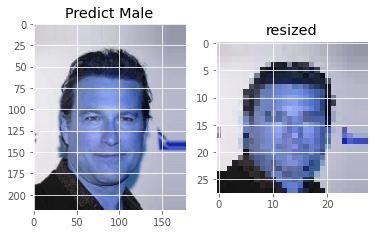

[[0. 1.]]


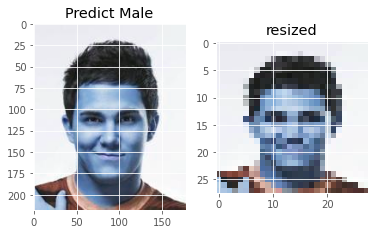

[[9.9985325e-01 1.4676020e-04]]


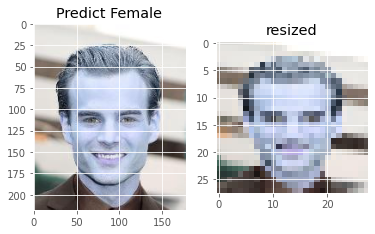

In [17]:
import os
import sys
import cv2
import matplotlib.pyplot as plt
import numpy as np 
from imutils import paths

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model


model=load_model('my.model') #check is the correct model
path='./dataset/test' #change if needed

imagePaths = sorted(list(paths.list_images(path)))

for imagePath in imagePaths:
    image_ori = cv2.imread(imagePath)
    image = cv2.resize(image_ori, (28, 28))
    imagearray = img_to_array(image)

    data=np.expand_dims(imagearray, axis=0)
    result=model.predict(data)
    print(result)

    r=np.argmax(result)
    label=['Female','Male'] #POS is 1, NEG is 0

    fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2)
    ax1.imshow(image_ori)
    ax1.set_title('Predict '+label[r])
    ax2.imshow(image)
    ax2.set_title('resized')
    plt.show()

### Question ###
1. How do you select images so that the classification works better?
1. How many images works well for your classification?
1. How can you improve on the model architecture?

### Answer
1.Try to choose photos with the same angle of the face  
2.There are a total of 24 test images, 20 of which are classified correctly.The accuracy is 0.8333  
3.Change the hyperparameters of the model, such as Activation、epoch、optimizer、batch_size    